# Exercise 2 - Neural Networks

In this exercise, you can play around parameterizing different dense neural networks in PyTorch, using two distinct datasets.

You can experiment with the structure of the networks e.g. number of hidden layers, number of hidden nodes per layer, activation function of each layer, batch normalization, dropout, etc. 

You can also parameterize the learning process, using different optimizers, learning rates, number of epochs, different loss functions, etc.

For each dataset, try learning different models, to get as good accuracy as possible in each classification task.

### 1. HASYv2 data set

Week 3 - exercise 2.1 has info on which file to extract, and we include the preprocessing below.

### 2. Sign language digits data set
You can download X.npy and Y.npy from https://www.kaggle.com/ardamavi/sign-language-digits-dataset.
Hint: you can use `np.load('../X.npy')` for extracting the data to a numpy array.

In [2]:
%matplotlib inline
import torch
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from sklearn.model_selection import train_test_split

## Load and preprocess data
### Run either of the following two cells depending on which data set you are working on each time

### - HASYv2
Use a train-test split ratio of 80% of the data used in training.

In [2]:
df = pd.read_csv('hasy-data-labels.csv')
df = df[df.symbol_id >= 70]
df = df[df.symbol_id <= 80]
data_vect = []
targets = []

for index, row in df.iterrows():
    img = plt.imread(row['path'])
    img = img.flatten()
    data_vect.append(img)
    targets.append(row['latex'])

X_tr, X_te, y_tr, y_te = train_test_split(data_vect, targets, train_size=0.8, test_size=0.2)
y_tr = list(map(int, y_tr))
y_te = list(map(int, y_te))
y_test_var = np.var(y_te)

### - Sign language digits
Use a train-test split ratio of 80% of the data used in training.

In [3]:
X = np.load('Sign-language-digits-dataset/X.npy')
y = np.load('Sign-language-digits-dataset/Y.npy').argmax(axis=1)
X_tr, X_te, y_tr, y_te = train_test_split(X, y, train_size=0.8, test_size=0.2)
y_test_var = np.var(y_te)

X_tr = X_tr.reshape(X_tr.shape[0],X_tr.shape[1]*X_tr.shape[2])
X_te = X_te.reshape(X_te.shape[0],X_te.shape[1]*X_te.shape[2])

### Create pytorch tensors from the numpy arrays

In [4]:
X_train = torch.from_numpy(np.array(X_tr, dtype='float32'))
y_train = torch.from_numpy(np.array(y_tr, dtype='int_'))
X_test = torch.from_numpy(np.array(X_te, dtype='float32'))
y_test = torch.from_numpy(np.array(y_te, dtype='int_'))

### Neural network parameterization
Here you can try different parameterizations of the following attributes:

In [5]:
#nn1
epochs1 = 100
hidden_nodes1 = 6
learning_rate1 = 0.05

#nn2
epochs2 = 100
hidden_nodes2 = 16
learning_rate2 = 0.05

### Defining the neural networks
Try as many different architectures as you wish. 
Change the activation function, batch normalization, add dropout to avoid overfitting, and have more than one layers as shown in nn2.

Read the PyTorch cheat sheet and tutorials for info on defining the architecture of the NNs, using activation functions, loss functions and learning rate scheduling https://pytorch.org/tutorials/beginner/ptcheat.html#deep-learning.

In [6]:
nn1 = torch.nn.Sequential(
    torch.nn.Linear(X_tr[0].shape[0], hidden_nodes1, bias=False), 
    torch.nn.BatchNorm1d(hidden_nodes1),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_nodes1, 10),
    torch.nn.Softmax(dim=1)
)

nn2 = torch.nn.Sequential(
    torch.nn.Linear(X_tr[0].shape[0], hidden_nodes2, bias=True), 
    torch.nn.BatchNorm1d(hidden_nodes2),
    torch.nn.ReLU(),
#    torch.nn.Linear(hidden_nodes2, hidden_nodes2),
 #   torch.nn.ReLU(),
    torch.nn.Linear(hidden_nodes2, 10), 
    torch.nn.Softmax(dim=1)
)

print(nn1)
print(nn2)

Sequential(
  (0): Linear(in_features=4096, out_features=6, bias=False)
  (1): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Linear(in_features=6, out_features=10, bias=True)
  (4): Softmax(dim=1)
)
Sequential(
  (0): Linear(in_features=4096, out_features=16, bias=True)
  (1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Linear(in_features=16, out_features=10, bias=True)
  (4): Softmax(dim=1)
)


### Training the networks
On the documentation given above, you can also find different optimizers and losses.

In [7]:
criterion = torch.nn.CrossEntropyLoss()
optimizer1 = torch.optim.Rprop(nn1.parameters())
optimizer2 = torch.optim.SGD(nn2.parameters(), lr=learning_rate2)

loss_values1 = []
loss_values2 = []

for t in range(epochs1):
    optimizer1.zero_grad()
    output1 = nn1.forward(X_train)
    loss1 = criterion(output1, y_train)
    loss1.backward()
    optimizer1.step()

    loss_values1.append(loss1.item() / len(X_train))
    
for t in range(epochs2):
    optimizer2.zero_grad()
    output2 = nn2.forward(X_train)
    loss2 = criterion(output2, y_train)
    loss2.backward()
    optimizer2.step()

    loss_values2.append(loss2.item() / len(X_train))

#print(loss1.item())
#print(loss2.item())

RuntimeError: Expected object of scalar type Long but got scalar type Int for argument #2 'target'

### Evaluation
Estimate the goodness of fit for each model you try out, and try to come up with the two best models you can for the two datasets.

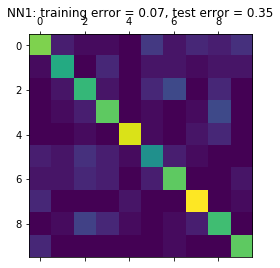

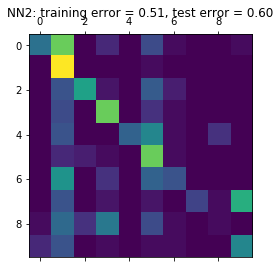

In [7]:
# predicted classes for the training set - NN1
y_pred_tr_nn1 = nn1.forward(X_train).data.numpy().argmax(axis=1)

# error for training set - NN1
train_error_nn1 = sklearn.metrics.zero_one_loss(y_train, y_pred_tr_nn1)

# predicted classes for the test set - NN1
y_pred_nn1 = nn1.forward(X_test).data.numpy().argmax(axis=1)

# error for test set - NN1
test_error_nn1 = sklearn.metrics.zero_one_loss(y_test, y_pred_nn1)

# plot confusion matrix
plt.matshow(sklearn.metrics.confusion_matrix(y_test, y_pred_nn1))
plt.title("NN1: training error = %.2f, test error = %.2f" % (train_error_nn1, test_error_nn1))
plt.show()

#--------------------------------------------------------------------------------------------------------------------

# predicted classes for the training set - NN2
y_pred_tr_nn2 = nn2.forward(X_train).data.numpy().argmax(axis=1)

# error for training set - NN2
train_error_nn2 = sklearn.metrics.zero_one_loss(y_train, y_pred_tr_nn2)

# predicted classes for the test set - NN1
y_pred_nn2 = nn2.forward(X_test).data.numpy().argmax(axis=1)

# error for test set - NN2
test_error_nn2 = sklearn.metrics.zero_one_loss(y_test, y_pred_nn2)

# plot confusion matrix
plt.matshow(sklearn.metrics.confusion_matrix(y_test, y_pred_nn2))
plt.title("NN2: training error = %.2f, test error = %.2f" % (train_error_nn2, test_error_nn2))
plt.show()

### Loss functions over epochs

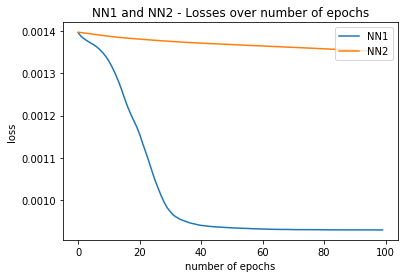

In [9]:
plt.title("NN1 and NN2 - Losses over number of epochs")        
plt.plot(loss_values1[0:], label='NN1')
plt.plot(loss_values2[0:], label='NN2')
plt.xlabel('number of epochs')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.show()

## Random Forest Classifier
Below we implement a Random Forest Classifier (RFC). Try different parameterizations here as well. Compare your best achieved scores with the different models. Which performs best? NNs or RFC? 

The dense NNs we use in this exercise are a bit simple, more complex NNs, such as a Convolutional Neural Network would generally do better than RFC.

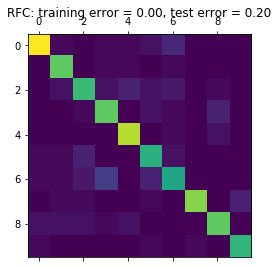

In [10]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=15, random_state=0, n_estimators=200)
rf.fit(X_train, y_train)
y_predtrain_rf = rf.predict(X_train)
train_error_rf = sklearn.metrics.zero_one_loss(y_train, y_predtrain_rf)
y_pred_rf = rf.predict(X_test)
test_error_rf = sklearn.metrics.zero_one_loss(y_test, y_pred_rf)

# plot confusion matrix
plt.matshow(sklearn.metrics.confusion_matrix(y_test, y_pred_rf))
plt.title("RFC: training error = %.2f, test error = %.2f" % (train_error_rf, test_error_rf))
plt.show()